theta0 is 16.995157232739547
theta1 is 1.3134560049239128


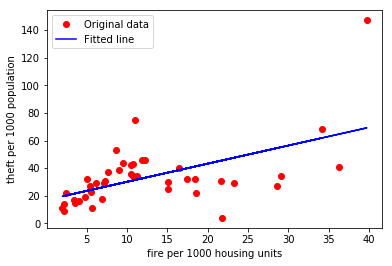

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd


'''
Step 1: Read in data from the .xls file
'''
DATA_FILE = 'data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)

number_of_rows = len(list(sheet.get_rows()))
data = np.asarray([sheet.row_values(i) for i in range(1, number_of_rows)])
number_of_samples = number_of_rows - 1

'''
Step 2: Construct the design and target matrices
'''
X = np.matrix(data.T[0]).T
X = np.concatenate([np.ones([number_of_samples, 1]), X], 1)

y = np.matrix(data.T[1]).T

'''
Step 3: Find estimated thetas from np.linalg.inv(X.T * X) * X.T * y
'''
estimated_theta = np.linalg.inv(X.T * X) * X.T * y

'''
Step 4: Print out the values of theta0 and theta1
'''
print("theta0 is {0}".format(estimated_theta.item(0)))
print("theta1 is {0}".format(estimated_theta.item(1)))

'''
Step 5: Plot the relationships
'''
plt.plot(data.T[0], data.T[1], 'ro', label='Original data')
plt.plot(data.T[0], estimated_theta.item(0) + estimated_theta.item(1) * data.T[0], 'b', label='Fitted line')
plt.xlabel('fire per 1000 housing units')
plt.ylabel('theft per 1000 population')
plt.legend()
plt.show()